<a href="https://colab.research.google.com/github/NitishPal2013/ML-For-Beginners/blob/main/Hotel_Review.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import matplotlib.pyplot as plt
from IPython.display import display

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
df = pd.read_csv('/content/Hotel_Reviews.csv')
df.head()

,Hotel_Address,Additional_Number_of_Scoring,Review_Date,Average_Score,Hotel_Name,Reviewer_Nationality,Negative_Review,Review_Total_Negative_Word_Counts,Total_Number_of_Reviews,Positive_Review,Review_Total_Positive_Word_Counts,Total_Number_of_Reviews_Reviewer_Has_Given,Reviewer_Score,Tags,days_since_review,lat,lng
0,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,8/3/2017,7.7,Hotel Arena,Russia,I am so angry that i made this post available...,397,1403,Only the park outside of the hotel was beauti...,11,7,2.9,"[' Leisure trip ', ' Couple ', ' Duplex Double...",0 days,52.360576,4.915968
1,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,8/3/2017,7.7,Hotel Arena,Ireland,No Negative,0,1403,No real complaints the hotel was great great ...,105,7,7.5,"[' Leisure trip ', ' Couple ', ' Duplex Double...",0 days,52.360576,4.915968
2,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,7/31/2017,7.7,Hotel Arena,Australia,Rooms are nice but for elderly a bit difficul...,42,1403,Location was good and staff were ok It is cut...,21,9,7.1,"[' Leisure trip ', ' Family with young childre...",3 days,52.360576,4.915968
3,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,7/31/2017,7.7,Hotel Arena,United Kingdom,My room was dirty and I was afraid to walk ba...,210,1403,Great location in nice surroundings the bar a...,26,1,3.8,"[' Leisure trip ', ' Solo traveler ', ' Duplex...",3 days,52.360576,4.915968
4,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,7/24/2017,7.7,Hotel Arena,New Zealand,You When I booked with your company on line y...,140,1403,Amazing location and building Romantic setting,8,3,6.7,"[' Leisure trip ', ' Couple ', ' Suite ', ' St...",10 days,52.360576,4.915968


# Our Aim :
* Most frequent words and phrases in reviews
* Tags and review realtion
* Does the NLTK sentiment matches with hotel scores ?

## Classification of Dataset Columns :-

1) **Hotel Columns** : These columns provides information of about the hotel.

```
Hotel_Name
Hotel_Address
lat
lng
```

2) **Meta Data** : These columns provides meta information about the hotels data.

```
Average_Score
Total_Number_of_Reviews
Additional_Number_of_Scoring
```

3) **Review Columns** : These provides the review data about the hotels .
```
Reviewer_Score
Negative_Review
Review_Total_Negative_Word_Counts
Positive_Review
Review_Total_Positive_Word_Counts
Review_Date
days_since_review
Tags
```

4) **Reviewer Columns** : These column provides the Reviewer Details .
```
Total_Number_of_Reviews_Reviewer_Has_Given
Reviewer_Nationality

```

In [ ]:
df.shape

(515738, 17)

Numbers realted to Revierwers Nationality

In [ ]:
# How many distict values are there for the column Reviewer_Nationality and what are they?
arr = df['Reviewer_Nationality'].unique()
print("Number of distinct Reviewer Nationalities = " + str(arr.shape[0]))
print("Nationalities :--- \n")
arr

Number of distinct Reviewer Nationalities = 227
Nationalities :--- 



array([' Russia ', ' Ireland ', ' Australia ', ' United Kingdom ',
       ' New Zealand ', ' Poland ', ' Belgium ', ' Norway ', ' France ',
       ' Italy ', ' Canada ', ' Netherlands ', ' Germany ',
       ' United States of America ', ' Hungary ', ' Israel ',
       ' Switzerland ', ' India ', ' United Arab Emirates ', ' Malaysia ',
       ' Denmark ', ' South Africa ', ' Rwanda ', ' Finland ',
       ' Portugal ', ' Luxembourg ', ' Spain ', ' Malta ', ' China ',
       ' Turkey ', ' Ukraine ', ' Gibraltar ', ' Argentina ',
       ' Abkhazia Georgia ', ' Isle of Man ', ' Sweden ', ' Croatia ',
       ' Saudi Arabia ', ' Lithuania ', ' Slovenia ', ' Panama ',
       ' Austria ', ' Brazil ', ' Taiwan ', ' Iceland ', ' Iran ',
       ' Liechtenstein ', ' Chile ', ' Hong Kong ',
       ' United States Minor Outlying Islands ', ' Morocco ', ' Oman ',
       ' Lebanon ', ' Qatar ', ' Nigeria ', ' Romania ',
       ' Czech Republic ', ' Greece ', ' Thailand ', ' Singapore ',
       ' Guerns

In [ ]:
# Most commmon nationality in dataset
nationality_counts = df['Reviewer_Nationality'].value_counts()
nationality_counts

 United Kingdom               245246
 United States of America      35437
 Australia                     21686
 Ireland                       14827
 United Arab Emirates          10235
                               ...  
 Cape Verde                        1
 Northern Mariana Islands          1
 Tuvalu                            1
 Guinea                            1
 Palau                             1
Name: Reviewer_Nationality, Length: 227, dtype: int64

<Axes: >

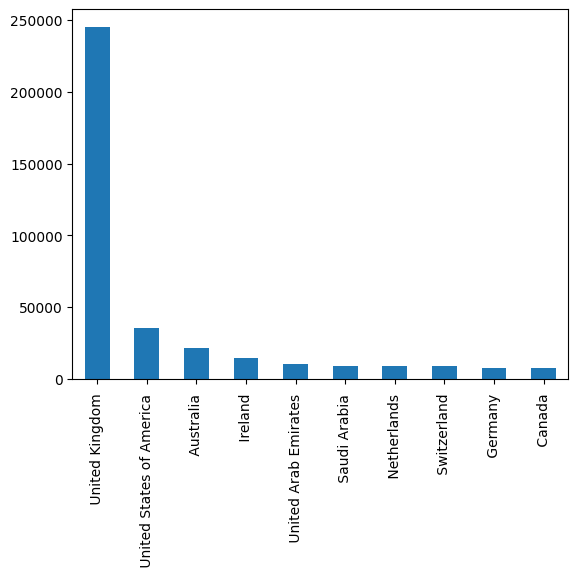

In [ ]:
nationality_counts[:10].plot(kind = 'bar')


The above plot shows the highest frequency reviewer nationalities.

In [ ]:
Top_nationalities = nationality_counts[:10]

In [ ]:
# What was the most frequently reviewed hotel for the top 10 nationalities

In [ ]:
filtered_df = df[df['Reviewer_Nationality'].isin(Top_nationalities.index)]
filtered_df

,Hotel_Address,Additional_Number_of_Scoring,Review_Date,Average_Score,Hotel_Name,Reviewer_Nationality,Negative_Review,Review_Total_Negative_Word_Counts,Total_Number_of_Reviews,Positive_Review,Review_Total_Positive_Word_Counts,Total_Number_of_Reviews_Reviewer_Has_Given,Reviewer_Score,Tags,days_since_review,lat,lng
1,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,8/3/2017,7.7,Hotel Arena,Ireland,No Negative,0,1403,No real complaints the hotel was great great ...,105,7,7.5,"[' Leisure trip ', ' Couple ', ' Duplex Double...",0 days,52.360576,4.915968
2,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,7/31/2017,7.7,Hotel Arena,Australia,Rooms are nice but for elderly a bit difficul...,42,1403,Location was good and staff were ok It is cut...,21,9,7.1,"[' Leisure trip ', ' Family with young childre...",3 days,52.360576,4.915968
3,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,7/31/2017,7.7,Hotel Arena,United Kingdom,My room was dirty and I was afraid to walk ba...,210,1403,Great location in nice surroundings the bar a...,26,1,3.8,"[' Leisure trip ', ' Solo traveler ', ' Duplex...",3 days,52.360576,4.915968
6,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,7/17/2017,7.7,Hotel Arena,United Kingdom,Cleaner did not change our sheet and duvet ev...,33,1403,The room is spacious and bright The hotel is ...,18,6,4.6,"[' Leisure trip ', ' Group ', ' Duplex Twin Ro...",17 days,52.360576,4.915968
7,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,7/17/2017,7.7,Hotel Arena,United Kingdom,Apart from the price for the brekfast Everyth...,11,1403,Good location Set in a lovely park friendly s...,19,1,10.0,"[' Leisure trip ', ' Couple ', ' Duplex Double...",17 days,52.360576,4.915968
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
515714,Wurzbachgasse 21 15 Rudolfsheim F nfhaus 1150 ...,168,4/14/2016,8.1,Atlantis Hotel Vienna,United Kingdom,Staff not always at reception and had to wait...,16,2823,The nice and friendly staff who were always h...,14,1,9.6,"[' Leisure trip ', ' Family with older childre...",476 day,48.203745,16.335677
515715,Wurzbachgasse 21 15 Rudolfsheim F nfhaus 1150 ...,168,3/30/2016,8.1,Atlantis Hotel Vienna,United Kingdom,would have liked restaurant also serving dinner,8,2823,Close to the metro station n super market,9,1,8.8,"[' Leisure trip ', ' Group ', ' Standard Doubl...",491 day,48.203745,16.335677
515722,Wurzbachgasse 21 15 Rudolfsheim F nfhaus 1150 ...,168,11/26/2015,8.1,Atlantis Hotel Vienna,United Kingdom,noisy at night air causing loud banging in he...,19,2823,clean,2,72,6.3,"[' Business trip ', ' Solo traveler ', ' Stand...",616 day,48.203745,16.335677
515727,Wurzbachgasse 21 15 Rudolfsheim F nfhaus 1150 ...,168,9/27/2015,8.1,Atlantis Hotel Vienna,United Kingdom,Wifi Location No tea or coffee in the room,10,2823,Rather cheap and not to far away from the cen...,15,12,5.8,"[' Leisure trip ', ' Couple ', ' Standard Doub...",676 day,48.203745,16.335677


In [ ]:
grouped_df = filtered_df.groupby(["Reviewer_Nationality","Hotel_Name"]).size().reset_index(name = "Number_of_Reviews")
grouped_df

,Reviewer_Nationality,Hotel_Name,Number_of_Reviews
0,Australia,11 Cadogan Gardens,5
1,Australia,1K Hotel,11
2,Australia,25hours Hotel beim MuseumsQuartier,25
3,Australia,41,6
4,Australia,88 Studios,20
...,...,...,...
13353,United States of America,citizenM London Bankside,59
13354,United States of America,citizenM London Shoreditch,32
13355,United States of America,citizenM Tower of London,73
13356,United States of America,every hotel Piccadilly,35


In [ ]:
sorted_df = grouped_df.sort_values('Number_of_Reviews',ascending = False)
sorted_df.head()

,Reviewer_Nationality,Hotel_Name,Number_of_Reviews
10581,United Kingdom,Britannia International Hotel Canary Wharf,3833
11686,United Kingdom,Strand Palace Hotel,2988
10678,United Kingdom,DoubleTree by Hilton Hotel London Tower of London,2579
11542,United Kingdom,Park Plaza Westminster Bridge London,2537
10637,United Kingdom,Copthorne Tara Hotel London Kensington,2501


In [ ]:
top_Hotels = []
for nat in Top_nationalities.index:
  result = sorted_df[sorted_df["Reviewer_Nationality"] == nat].iloc[0]
  top_Hotels.append(result["Hotel_Name"])
  print(f'The most reviewed hotel for {result["Reviewer_Nationality"]} was {result["Hotel_Name"]} with {result["Number_of_Reviews"]} .')

The most reviewed hotel for  United Kingdom  was Britannia International Hotel Canary Wharf with 3833 .
The most reviewed hotel for  United States of America  was Hotel Esther a with 423 .
The most reviewed hotel for  Australia  was Park Plaza Westminster Bridge London with 167 .
The most reviewed hotel for  Ireland  was Copthorne Tara Hotel London Kensington with 239 .
The most reviewed hotel for  United Arab Emirates  was Millennium Hotel London Knightsbridge with 129 .
The most reviewed hotel for  Saudi Arabia  was The Cumberland A Guoman Hotel with 142 .
The most reviewed hotel for  Netherlands  was Jaz Amsterdam with 97 .
The most reviewed hotel for  Switzerland  was Hotel Da Vinci with 97 .
The most reviewed hotel for  Germany  was Hotel Da Vinci with 86 .
The most reviewed hotel for  Canada  was St James Court A Taj Hotel London with 61 .


In [ ]:
# Number of Reviews of per Hotel.
Hotel_review_freq = df["Hotel_Name"].value_counts()
Hotel_review_freq

Britannia International Hotel Canary Wharf           4789
Strand Palace Hotel                                  4256
Park Plaza Westminster Bridge London                 4169
Copthorne Tara Hotel London Kensington               3578
DoubleTree by Hilton Hotel London Tower of London    3212
                                                     ... 
Ibis Styles Milano Palmanova                           12
Hotel Eitlj rg                                         12
Hotel Wagner                                           10
Mercure Paris Porte d Orleans                          10
Hotel Gallitzinberg                                     8
Name: Hotel_Name, Length: 1492, dtype: int64

In [ ]:
hotel_grouped = df.groupby("Hotel_Name")["Reviewer_Score"].mean().reset_index(name = "Calc_Average_Score")

In [ ]:
hotel_grouped

,Hotel_Name,Calc_Average_Score
0,11 Cadogan Gardens,8.845283
1,1K Hotel,7.861486
2,25hours Hotel beim MuseumsQuartier,8.983309
3,41,9.711650
4,45 Park Lane Dorchester Collection,9.603571
...,...,...
1487,citizenM London Bankside,9.112261
1488,citizenM London Shoreditch,9.092005
1489,citizenM Tower of London,9.135591
1490,every hotel Piccadilly,8.967782


In [ ]:
# prompt: merge the df and hotel_grouped dataframe in a new dataframe name merge_df. Merging is on Hotel_Name.

merge_df = pd.merge(df, hotel_grouped, on="Hotel_Name")
merge_df

,Hotel_Address,Additional_Number_of_Scoring,Review_Date,Average_Score,Hotel_Name,Reviewer_Nationality,Negative_Review,Review_Total_Negative_Word_Counts,Total_Number_of_Reviews,Positive_Review,Review_Total_Positive_Word_Counts,Total_Number_of_Reviews_Reviewer_Has_Given,Reviewer_Score,Tags,days_since_review,lat,lng,Calc_Average_Score
0,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,8/3/2017,7.7,Hotel Arena,Russia,I am so angry that i made this post available...,397,1403,Only the park outside of the hotel was beauti...,11,7,2.9,"[' Leisure trip ', ' Couple ', ' Duplex Double...",0 days,52.360576,4.915968,7.836296
1,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,8/3/2017,7.7,Hotel Arena,Ireland,No Negative,0,1403,No real complaints the hotel was great great ...,105,7,7.5,"[' Leisure trip ', ' Couple ', ' Duplex Double...",0 days,52.360576,4.915968,7.836296
2,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,7/31/2017,7.7,Hotel Arena,Australia,Rooms are nice but for elderly a bit difficul...,42,1403,Location was good and staff were ok It is cut...,21,9,7.1,"[' Leisure trip ', ' Family with young childre...",3 days,52.360576,4.915968,7.836296
3,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,7/31/2017,7.7,Hotel Arena,United Kingdom,My room was dirty and I was afraid to walk ba...,210,1403,Great location in nice surroundings the bar a...,26,1,3.8,"[' Leisure trip ', ' Solo traveler ', ' Duplex...",3 days,52.360576,4.915968,7.836296
4,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,7/24/2017,7.7,Hotel Arena,New Zealand,You When I booked with your company on line y...,140,1403,Amazing location and building Romantic setting,8,3,6.7,"[' Leisure trip ', ' Couple ', ' Suite ', ' St...",10 days,52.360576,4.915968,7.836296
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
515733,Wurzbachgasse 21 15 Rudolfsheim F nfhaus 1150 ...,168,8/30/2015,8.1,Atlantis Hotel Vienna,Kuwait,no trolly or staff to help you take the lugga...,14,2823,location,2,8,7.0,"[' Leisure trip ', ' Family with older childre...",704 day,48.203745,16.335677,7.760000
515734,Wurzbachgasse 21 15 Rudolfsheim F nfhaus 1150 ...,168,8/22/2015,8.1,Atlantis Hotel Vienna,Estonia,The hotel looks like 3 but surely not 4,11,2823,Breakfast was ok and we got earlier check in,11,12,5.8,"[' Leisure trip ', ' Family with young childre...",712 day,48.203745,16.335677,7.760000
515735,Wurzbachgasse 21 15 Rudolfsheim F nfhaus 1150 ...,168,8/19/2015,8.1,Atlantis Hotel Vienna,Egypt,The ac was useless It was a hot week in vienn...,19,2823,No Positive,0,3,2.5,"[' Leisure trip ', ' Family with older childre...",715 day,48.203745,16.335677,7.760000
515736,Wurzbachgasse 21 15 Rudolfsheim F nfhaus 1150 ...,168,8/17/2015,8.1,Atlantis Hotel Vienna,Mexico,No Negative,0,2823,The rooms are enormous and really comfortable...,25,3,8.8,"[' Leisure trip ', ' Group ', ' Standard Tripl...",717 day,48.203745,16.335677,7.760000


In [ ]:
merge_df.head()

,Hotel_Address,Additional_Number_of_Scoring,Review_Date,Average_Score,Hotel_Name,Reviewer_Nationality,Negative_Review,Review_Total_Negative_Word_Counts,Total_Number_of_Reviews,Positive_Review,Review_Total_Positive_Word_Counts,Total_Number_of_Reviews_Reviewer_Has_Given,Reviewer_Score,Tags,days_since_review,lat,lng,Calc_Average_Score
0,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,8/3/2017,7.7,Hotel Arena,Russia,I am so angry that i made this post available...,397,1403,Only the park outside of the hotel was beauti...,11,7,2.9,"[' Leisure trip ', ' Couple ', ' Duplex Double...",0 days,52.360576,4.915968,7.836296
1,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,8/3/2017,7.7,Hotel Arena,Ireland,No Negative,0,1403,No real complaints the hotel was great great ...,105,7,7.5,"[' Leisure trip ', ' Couple ', ' Duplex Double...",0 days,52.360576,4.915968,7.836296
2,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,7/31/2017,7.7,Hotel Arena,Australia,Rooms are nice but for elderly a bit difficul...,42,1403,Location was good and staff were ok It is cut...,21,9,7.1,"[' Leisure trip ', ' Family with young childre...",3 days,52.360576,4.915968,7.836296
3,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,7/31/2017,7.7,Hotel Arena,United Kingdom,My room was dirty and I was afraid to walk ba...,210,1403,Great location in nice surroundings the bar a...,26,1,3.8,"[' Leisure trip ', ' Solo traveler ', ' Duplex...",3 days,52.360576,4.915968,7.836296
4,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,7/24/2017,7.7,Hotel Arena,New Zealand,You When I booked with your company on line y...,140,1403,Amazing location and building Romantic setting,8,3,6.7,"[' Leisure trip ', ' Couple ', ' Suite ', ' St...",10 days,52.360576,4.915968,7.836296


In [ ]:
def compare_scores(row):
  return round(row["Average_Score"] - row["Calc_Average_Score"], 1)

In [ ]:
sel_df = merge_df[["Hotel_Name", "Average_Score", "Calc_Average_Score"]]
sel_df.head()

,Hotel_Name,Average_Score,Calc_Average_Score
0,Hotel Arena,7.7,7.836296
1,Hotel Arena,7.7,7.836296
2,Hotel Arena,7.7,7.836296
3,Hotel Arena,7.7,7.836296
4,Hotel Arena,7.7,7.836296


In [ ]:
sel_df["Average_Difference"] = sel_df.apply(compare_scores, axis = 1)
sel_df.head()

<ipython-input-42-6830a7182c68>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sel_df["Average_Difference"] = sel_df.apply(compare_scores, axis = 1)


,Hotel_Name,Average_Score,Calc_Average_Score,Average_Difference
0,Hotel Arena,7.7,7.836296,-0.1
1,Hotel Arena,7.7,7.836296,-0.1
2,Hotel Arena,7.7,7.836296,-0.1
3,Hotel Arena,7.7,7.836296,-0.1
4,Hotel Arena,7.7,7.836296,-0.1


In [ ]:
sel_df.drop_duplicates(subset = ["Hotel_Name"], inplace = True)
sel_df.sort_values(by = "Average_Difference", inplace = True)
sel_df

<ipython-input-43-e91c20205d3d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sel_df.drop_duplicates(subset = ["Hotel_Name"], inplace = True)
<ipython-input-43-e91c20205d3d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sel_df.sort_values(by = "Average_Difference", inplace = True)


,Hotel_Name,Average_Score,Calc_Average_Score,Average_Difference
495945,Best Western Hotel Astoria,7.7,8.462162,-0.8
178253,Renaissance Paris Vendome Hotel,7.9,8.578571,-0.7
111027,Hotel Stendhal Place Vend me Paris MGallery by...,8.8,9.465517,-0.7
43688,Mercure Paris Porte d Orleans,7.5,8.180000,-0.7
218258,Hotel Royal Elys es,7.0,7.453333,-0.5
...,...,...,...,...
350795,Hotel Gallitzinberg,8.6,7.875000,0.7
22189,Holiday Inn Paris Montparnasse Pasteur,7.1,6.329730,0.8
250308,MARQUIS Faubourg St Honor Relais Ch teaux,8.6,7.730769,0.9
68936,Villa Eugenie,6.8,5.864516,0.9


In [ ]:
# Number of rows having Negative_Reviews
No_Negatives = df[df["Negative_Review"] == "No Negative"]["Negative_Review"].count()
# Number of rows having Positive_Reviews
No_Positives = df[df["Positive_Review"] == "No Positive"]["Positive_Review"].count()
No_positives_and_negatives = df[(df["Positive_Review"] == "No Positive")][(df["Negative_Review"] == "No Negative")]["Hotel_Name"].count()
print("Number of No Negative review = ", No_Negatives)
print("Number of No Positive review = ", No_Positives)
print("Number of both No negatives and No positves = ", No_positives_and_negatives)

Number of No Negative review =  127890
Number of No Positive review =  35946
Number of both No negatives and No positves =  127


<ipython-input-44-107f17ed3d54>:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  No_positives_and_negatives = df[(df["Positive_Review"] == "No Positive")][(df["Negative_Review"] == "No Negative")]["Hotel_Name"].count()


In [ ]:
merge_df.head()

,Hotel_Address,Additional_Number_of_Scoring,Review_Date,Average_Score,Hotel_Name,Reviewer_Nationality,Negative_Review,Review_Total_Negative_Word_Counts,Total_Number_of_Reviews,Positive_Review,Review_Total_Positive_Word_Counts,Total_Number_of_Reviews_Reviewer_Has_Given,Reviewer_Score,Tags,days_since_review,lat,lng,Calc_Average_Score
0,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,8/3/2017,7.7,Hotel Arena,Russia,I am so angry that i made this post available...,397,1403,Only the park outside of the hotel was beauti...,11,7,2.9,"[' Leisure trip ', ' Couple ', ' Duplex Double...",0 days,52.360576,4.915968,7.836296
1,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,8/3/2017,7.7,Hotel Arena,Ireland,No Negative,0,1403,No real complaints the hotel was great great ...,105,7,7.5,"[' Leisure trip ', ' Couple ', ' Duplex Double...",0 days,52.360576,4.915968,7.836296
2,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,7/31/2017,7.7,Hotel Arena,Australia,Rooms are nice but for elderly a bit difficul...,42,1403,Location was good and staff were ok It is cut...,21,9,7.1,"[' Leisure trip ', ' Family with young childre...",3 days,52.360576,4.915968,7.836296
3,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,7/31/2017,7.7,Hotel Arena,United Kingdom,My room was dirty and I was afraid to walk ba...,210,1403,Great location in nice surroundings the bar a...,26,1,3.8,"[' Leisure trip ', ' Solo traveler ', ' Duplex...",3 days,52.360576,4.915968,7.836296
4,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,7/24/2017,7.7,Hotel Arena,New Zealand,You When I booked with your company on line y...,140,1403,Amazing location and building Romantic setting,8,3,6.7,"[' Leisure trip ', ' Couple ', ' Suite ', ' St...",10 days,52.360576,4.915968,7.836296


In [ ]:
def replace_address(row):
  if "Netherlands" in row["Hotel_Address"]:
    return "Amsterdma, Netherlands"
  elif "Barcelona" in row["Hotel_Address"]:
    return "Barcelona, Spain"
  elif "United Kingdom" in row['Hotel_Address']:
    return "London, United Kingdom"
  elif "Milan" in row['Hotel_Address']:
    return "Milan, Italy"
  elif "France" in row["Hotel_Address"]:
    return "Paris, France"
  elif "Vienna" in row["Hotel_Address"]:
    return 'Vienna, Australia'

In [ ]:
# prompt: drop lat and lng column fomr df dataframe

df.drop(['lat', 'lng'], axis=1, inplace=True)
df.columns

Index(['Hotel_Address', 'Additional_Number_of_Scoring', 'Review_Date',
       'Average_Score', 'Hotel_Name', 'Reviewer_Nationality',
       'Negative_Review', 'Review_Total_Negative_Word_Counts',
       'Total_Number_of_Reviews', 'Positive_Review',
       'Review_Total_Positive_Word_Counts',
       'Total_Number_of_Reviews_Reviewer_Has_Given', 'Reviewer_Score', 'Tags',
       'days_since_review'],
      dtype='object')

In [ ]:
df["Hotel_Address"] = df.apply(replace_address, axis = 1)
print(df["Hotel_Address"].value_counts())

London, United Kingdom    262301
Barcelona, Spain           60149
Paris, France              59928
Amsterdma, Netherlands     57214
Vienna, Australia          38939
Milan, Italy               37207
Name: Hotel_Address, dtype: int64


In [ ]:
display(df.groupby("Hotel_Address").agg({"Hotel_Name": "nunique"}))

,Hotel_Name
Hotel_Address,
"Amsterdma, Netherlands",105
"Barcelona, Spain",211
"London, United Kingdom",400
"Milan, Italy",162
"Paris, France",458
"Vienna, Australia",158


In [ ]:
Hotel_Names

array(['Hotel Arena', 'K K Hotel George', 'Apex Temple Court Hotel', ...,
       'The Berkeley', 'Holiday Inn London Kensington',
       'Atlantis Hotel Vienna'], dtype=object)

In [ ]:
Number_of_reviews = []
for hotel in Hotel_Names:
  temp = df[df["Hotel_Name"] == hotel][['Hotel_Name',"Positive_Review", "Negative_Review"]]
  negatives = temp["Negative_Review"].count()
  positives = temp["Positive_Review"].count()
  Number_of_reviews.append(negatives + positives)
print(Number_of_reviews)

[810, 1132, 2074, 3540, 70, 38, 2850, 4446, 272, 254, 436, 320, 360, 5916, 172, 2014, 512, 178, 448, 358, 164, 216, 270, 2566, 242, 5102, 338, 342, 172, 92, 140, 346, 282, 320, 98, 982, 2308, 764, 148, 1202, 778, 424, 132, 58, 152, 182, 50, 240, 68, 74, 190, 226, 182, 164, 534, 324, 2484, 610, 2018, 1028, 488, 3034, 550, 344, 30, 856, 1724, 1184, 218, 666, 1988, 980, 1062, 926, 790, 266, 88, 318, 154, 48, 230, 466, 144, 442, 112, 1424, 140, 724, 478, 168, 464, 574, 378, 1004, 80, 136, 174, 402, 250, 562, 690, 1648, 1562, 192, 144, 324, 152, 80, 148, 150, 132, 1536, 260, 106, 260, 116, 1504, 518, 496, 296, 626, 158, 20, 70, 300, 334, 1204, 1938, 2708, 82, 960, 1456, 1112, 54, 388, 160, 152, 484, 230, 126, 2036, 156, 410, 692, 190, 154, 202, 1268, 2334, 378, 538, 282, 204, 54, 554, 828, 56, 144, 274, 200, 182, 100, 140, 242, 516, 334, 870, 1890, 812, 4310, 156, 2158, 332, 762, 376, 1078, 226, 280, 132, 536, 208, 550, 160, 174, 592, 660, 9578, 202, 208, 124, 940, 152, 2014, 156, 152, 92, 

In [ ]:
len(Number_of_reviews)

1492

In [ ]:
Review_df = pd.DataFrame(data = {"Hotel_Name": Hotel_Names, "Total_Number_of_review" : Number_of_reviews})
Review_df

,Hotel_Name,Total_Number_of_review
0,Hotel Arena,810
1,K K Hotel George,1132
2,Apex Temple Court Hotel,2074
3,The Park Grand London Paddington,3540
4,Monhotel Lounge SPA,70
...,...,...
1487,Suite Hotel 900 m zur Oper,878
1488,Hotel Amadeus,288
1489,The Berkeley,200
1490,Holiday Inn London Kensington,5536


In [ ]:
df = pd.merge(df, Review_df, on='Hotel_Name', how='left')
df.head()

,Hotel_Address,Review_Date,Average_Score,Hotel_Name,Reviewer_Nationality,Negative_Review,Review_Total_Negative_Word_Counts,Total_Number_of_Reviews,Positive_Review,Review_Total_Positive_Word_Counts,Total_Number_of_Reviews_Reviewer_Has_Given,Reviewer_Score,Tags,days_since_review,Total_Number_of_review
0,"Amsterdma, Netherlands",8/3/2017,7.7,Hotel Arena,Russia,I am so angry that i made this post available...,397,1403,Only the park outside of the hotel was beauti...,11,7,2.9,"[' Leisure trip ', ' Couple ', ' Duplex Double...",0 days,810
1,"Amsterdma, Netherlands",8/3/2017,7.7,Hotel Arena,Ireland,No Negative,0,1403,No real complaints the hotel was great great ...,105,7,7.5,"[' Leisure trip ', ' Couple ', ' Duplex Double...",0 days,810
2,"Amsterdma, Netherlands",7/31/2017,7.7,Hotel Arena,Australia,Rooms are nice but for elderly a bit difficul...,42,1403,Location was good and staff were ok It is cut...,21,9,7.1,"[' Leisure trip ', ' Family with young childre...",3 days,810
3,"Amsterdma, Netherlands",7/31/2017,7.7,Hotel Arena,United Kingdom,My room was dirty and I was afraid to walk ba...,210,1403,Great location in nice surroundings the bar a...,26,1,3.8,"[' Leisure trip ', ' Solo traveler ', ' Duplex...",3 days,810
4,"Amsterdma, Netherlands",7/24/2017,7.7,Hotel Arena,New Zealand,You When I booked with your company on line y...,140,1403,Amazing location and building Romantic setting,8,3,6.7,"[' Leisure trip ', ' Couple ', ' Suite ', ' St...",10 days,810


In [ ]:
# df["Total_Number_of_Reviews"] = df["Total_Number_of_review"]
df.head()

,Hotel_Address,Review_Date,Average_Score,Hotel_Name,Reviewer_Nationality,Negative_Review,Review_Total_Negative_Word_Counts,Total_Number_of_Reviews,Positive_Review,Review_Total_Positive_Word_Counts,Total_Number_of_Reviews_Reviewer_Has_Given,Reviewer_Score,Tags,days_since_review,Total_Number_of_review
0,"Amsterdma, Netherlands",8/3/2017,7.7,Hotel Arena,Russia,I am so angry that i made this post available...,397,810,Only the park outside of the hotel was beauti...,11,7,2.9,"[' Leisure trip ', ' Couple ', ' Duplex Double...",0 days,810
1,"Amsterdma, Netherlands",8/3/2017,7.7,Hotel Arena,Ireland,No Negative,0,810,No real complaints the hotel was great great ...,105,7,7.5,"[' Leisure trip ', ' Couple ', ' Duplex Double...",0 days,810
2,"Amsterdma, Netherlands",7/31/2017,7.7,Hotel Arena,Australia,Rooms are nice but for elderly a bit difficul...,42,810,Location was good and staff were ok It is cut...,21,9,7.1,"[' Leisure trip ', ' Family with young childre...",3 days,810
3,"Amsterdma, Netherlands",7/31/2017,7.7,Hotel Arena,United Kingdom,My room was dirty and I was afraid to walk ba...,210,810,Great location in nice surroundings the bar a...,26,1,3.8,"[' Leisure trip ', ' Solo traveler ', ' Duplex...",3 days,810
4,"Amsterdma, Netherlands",7/24/2017,7.7,Hotel Arena,New Zealand,You When I booked with your company on line y...,140,810,Amazing location and building Romantic setting,8,3,6.7,"[' Leisure trip ', ' Couple ', ' Suite ', ' St...",10 days,810


In [ ]:
df.drop('Total_Number_of_review', axis=1, inplace=True)
df.head()

,Hotel_Address,Review_Date,Average_Score,Hotel_Name,Reviewer_Nationality,Negative_Review,Review_Total_Negative_Word_Counts,Total_Number_of_Reviews,Positive_Review,Review_Total_Positive_Word_Counts,Total_Number_of_Reviews_Reviewer_Has_Given,Reviewer_Score,Tags,days_since_review
0,"Amsterdma, Netherlands",8/3/2017,7.7,Hotel Arena,Russia,I am so angry that i made this post available...,397,810,Only the park outside of the hotel was beauti...,11,7,2.9,"[' Leisure trip ', ' Couple ', ' Duplex Double...",0 days
1,"Amsterdma, Netherlands",8/3/2017,7.7,Hotel Arena,Ireland,No Negative,0,810,No real complaints the hotel was great great ...,105,7,7.5,"[' Leisure trip ', ' Couple ', ' Duplex Double...",0 days
2,"Amsterdma, Netherlands",7/31/2017,7.7,Hotel Arena,Australia,Rooms are nice but for elderly a bit difficul...,42,810,Location was good and staff were ok It is cut...,21,9,7.1,"[' Leisure trip ', ' Family with young childre...",3 days
3,"Amsterdma, Netherlands",7/31/2017,7.7,Hotel Arena,United Kingdom,My room was dirty and I was afraid to walk ba...,210,810,Great location in nice surroundings the bar a...,26,1,3.8,"[' Leisure trip ', ' Solo traveler ', ' Duplex...",3 days
4,"Amsterdma, Netherlands",7/24/2017,7.7,Hotel Arena,New Zealand,You When I booked with your company on line y...,140,810,Amazing location and building Romantic setting,8,3,6.7,"[' Leisure trip ', ' Couple ', ' Suite ', ' St...",10 days


In [ ]:
# prompt: convert df into csv

df.to_csv('Hotel_Reviews_Cleaned.csv', index=False)


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 515738 entries, 0 to 515737
Data columns (total 14 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   Hotel_Address                               515738 non-null  object 
 1   Review_Date                                 515738 non-null  object 
 2   Average_Score                               515738 non-null  float64
 3   Hotel_Name                                  515738 non-null  object 
 4   Reviewer_Nationality                        515738 non-null  object 
 5   Negative_Review                             515738 non-null  object 
 6   Review_Total_Negative_Word_Counts           515738 non-null  int64  
 7   Total_Number_of_Reviews                     515738 non-null  int64  
 8   Positive_Review                             515738 non-null  object 
 9   Review_Total_Positive_Word_Counts           515738 non-null  int64  
 

In [ ]:
cleaned_df = pd.read_csv("/content/Hotel_Reviews_Cleaned.csv")
cleaned_df

,Hotel_Address,Review_Date,Average_Score,Hotel_Name,Reviewer_Nationality,Negative_Review,Review_Total_Negative_Word_Counts,Total_Number_of_Reviews,Positive_Review,Review_Total_Positive_Word_Counts,Total_Number_of_Reviews_Reviewer_Has_Given,Reviewer_Score,Tags,days_since_review
0,"Amsterdma, Netherlands",8/3/2017,7.7,Hotel Arena,Russia,I am so angry that i made this post available...,397,810,Only the park outside of the hotel was beauti...,11,7,2.9,"[' Leisure trip ', ' Couple ', ' Duplex Double...",0 days
1,"Amsterdma, Netherlands",8/3/2017,7.7,Hotel Arena,Ireland,No Negative,0,810,No real complaints the hotel was great great ...,105,7,7.5,"[' Leisure trip ', ' Couple ', ' Duplex Double...",0 days
2,"Amsterdma, Netherlands",7/31/2017,7.7,Hotel Arena,Australia,Rooms are nice but for elderly a bit difficul...,42,810,Location was good and staff were ok It is cut...,21,9,7.1,"[' Leisure trip ', ' Family with young childre...",3 days
3,"Amsterdma, Netherlands",7/31/2017,7.7,Hotel Arena,United Kingdom,My room was dirty and I was afraid to walk ba...,210,810,Great location in nice surroundings the bar a...,26,1,3.8,"[' Leisure trip ', ' Solo traveler ', ' Duplex...",3 days
4,"Amsterdma, Netherlands",7/24/2017,7.7,Hotel Arena,New Zealand,You When I booked with your company on line y...,140,810,Amazing location and building Romantic setting,8,3,6.7,"[' Leisure trip ', ' Couple ', ' Suite ', ' St...",10 days
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
515733,"Vienna, Australia",8/30/2015,8.1,Atlantis Hotel Vienna,Kuwait,no trolly or staff to help you take the lugga...,14,650,location,2,8,7.0,"[' Leisure trip ', ' Family with older childre...",704 day
515734,"Vienna, Australia",8/22/2015,8.1,Atlantis Hotel Vienna,Estonia,The hotel looks like 3 but surely not 4,11,650,Breakfast was ok and we got earlier check in,11,12,5.8,"[' Leisure trip ', ' Family with young childre...",712 day
515735,"Vienna, Australia",8/19/2015,8.1,Atlantis Hotel Vienna,Egypt,The ac was useless It was a hot week in vienn...,19,650,No Positive,0,3,2.5,"[' Leisure trip ', ' Family with older childre...",715 day
515736,"Vienna, Australia",8/17/2015,8.1,Atlantis Hotel Vienna,Mexico,No Negative,0,650,The rooms are enormous and really comfortable...,25,3,8.8,"[' Leisure trip ', ' Group ', ' Standard Tripl...",717 day


In [ ]:
cleaned_df.drop("Total_Number_of_Reviews_Reviewer_Has_Given", axis = 1, inplace = True)
cleaned_df

,Hotel_Address,Review_Date,Average_Score,Hotel_Name,Reviewer_Nationality,Negative_Review,Review_Total_Negative_Word_Counts,Total_Number_of_Reviews,Positive_Review,Review_Total_Positive_Word_Counts,Reviewer_Score,Tags,days_since_review
0,"Amsterdma, Netherlands",8/3/2017,7.7,Hotel Arena,Russia,I am so angry that i made this post available...,397,810,Only the park outside of the hotel was beauti...,11,2.9,"[' Leisure trip ', ' Couple ', ' Duplex Double...",0 days
1,"Amsterdma, Netherlands",8/3/2017,7.7,Hotel Arena,Ireland,No Negative,0,810,No real complaints the hotel was great great ...,105,7.5,"[' Leisure trip ', ' Couple ', ' Duplex Double...",0 days
2,"Amsterdma, Netherlands",7/31/2017,7.7,Hotel Arena,Australia,Rooms are nice but for elderly a bit difficul...,42,810,Location was good and staff were ok It is cut...,21,7.1,"[' Leisure trip ', ' Family with young childre...",3 days
3,"Amsterdma, Netherlands",7/31/2017,7.7,Hotel Arena,United Kingdom,My room was dirty and I was afraid to walk ba...,210,810,Great location in nice surroundings the bar a...,26,3.8,"[' Leisure trip ', ' Solo traveler ', ' Duplex...",3 days
4,"Amsterdma, Netherlands",7/24/2017,7.7,Hotel Arena,New Zealand,You When I booked with your company on line y...,140,810,Amazing location and building Romantic setting,8,6.7,"[' Leisure trip ', ' Couple ', ' Suite ', ' St...",10 days
...,...,...,...,...,...,...,...,...,...,...,...,...,...
515733,"Vienna, Australia",8/30/2015,8.1,Atlantis Hotel Vienna,Kuwait,no trolly or staff to help you take the lugga...,14,650,location,2,7.0,"[' Leisure trip ', ' Family with older childre...",704 day
515734,"Vienna, Australia",8/22/2015,8.1,Atlantis Hotel Vienna,Estonia,The hotel looks like 3 but surely not 4,11,650,Breakfast was ok and we got earlier check in,11,5.8,"[' Leisure trip ', ' Family with young childre...",712 day
515735,"Vienna, Australia",8/19/2015,8.1,Atlantis Hotel Vienna,Egypt,The ac was useless It was a hot week in vienn...,19,650,No Positive,0,2.5,"[' Leisure trip ', ' Family with older childre...",715 day
515736,"Vienna, Australia",8/17/2015,8.1,Atlantis Hotel Vienna,Mexico,No Negative,0,650,The rooms are enormous and really comfortable...,25,8.8,"[' Leisure trip ', ' Group ', ' Standard Tripl...",717 day


from matplotlib import pyplot as plt
_df_0['index'].plot(kind='hist', bins=20, title='index')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['Average_Score'].plot(kind='hist', bins=20, title='Average_Score')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2['Review_Total_Negative_Word_Counts'].plot(kind='hist', bins=20, title='Review_Total_Negative_Word_Counts')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3['Total_Number_of_Reviews'].plot(kind='hist', bins=20, title='Total_Number_of_Reviews')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_4.groupby('Hotel_Address').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_5.plot(kind='scatter', x='index', y='Average_Score', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_6.plot(kind='scatter', x='Average_Score', y='Review_Total_Negative_Word_Counts', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_7.plot(kind='scatter', x='Review_Total_Negative_Word_Counts', y='Total_Number_of_Reviews', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_8.plot(kind='scatter', x='Total_Number_of_Reviews', y='Review_Total_Positive_Word_Counts', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['index']
  ys = series['Average_Score']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_9.sort_values('index', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('Hotel_Address')):
  _plot_series(series, series_name, i)
  fig.legend(title='Hotel_Address', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('Average_Score')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['index']
  ys = series['Review_Total_Negative_Word_Counts']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_10.sort_values('index', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('Hotel_Address')):
  _plot_series(series, series_name, i)
  fig.legend(title='Hotel_Address', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('Review_Total_Negative_Word_Counts')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['index']
  ys = series['Total_Number_of_Reviews']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_11.sort_values('index', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('Hotel_Address')):
  _plot_series(series, series_name, i)
  fig.legend(title='Hotel_Address', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('Total_Number_of_Reviews')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['index']
  ys = series['Review_Total_Positive_Word_Counts']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_12.sort_values('index', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('Hotel_Address')):
  _plot_series(series, series_name, i)
  fig.legend(title='Hotel_Address', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('Review_Total_Positive_Word_Counts')

from matplotlib import pyplot as plt
_df_13['index'].plot(kind='line', figsize=(8, 4), title='index')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_14['Average_Score'].plot(kind='line', figsize=(8, 4), title='Average_Score')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_15['Review_Total_Negative_Word_Counts'].plot(kind='line', figsize=(8, 4), title='Review_Total_Negative_Word_Counts')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_16['Total_Number_of_Reviews'].plot(kind='line', figsize=(8, 4), title='Total_Number_of_Reviews')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_17['Hotel_Address'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_17, x='index', y='Hotel_Address', inner='box', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_18['Hotel_Address'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_18, x='Average_Score', y='Hotel_Address', inner='box', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_19['Hotel_Address'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_19, x='Review_Total_Negative_Word_Counts', y='Hotel_Address', inner='box', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_20['Hotel_Address'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_20, x='Total_Number_of_Reviews', y='Hotel_Address', inner='box', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

In [ ]:
sample_Tags = cleaned_df["Tags"].sample(10)
print(sample_Tags)

187866    [' Leisure trip ', ' Couple ', ' Superior Doub...
460195    [' Leisure trip ', ' Couple ', ' Standard Doub...
421545    [' Leisure trip ', ' Couple ', ' Double Room '...
353528    [' Leisure trip ', ' Family with young childre...
422933    [' Business trip ', ' Group ', ' Double or Twi...
296612    [' Business trip ', ' Solo traveler ', ' Stand...
103592    [' Leisure trip ', ' Couple ', ' Classic Doubl...
169215    [' Leisure trip ', ' Couple ', ' Double Guest ...
144159    [' Leisure trip ', ' Family with young childre...
89225     [' Leisure trip ', ' Group ', ' Standard Doubl...
Name: Tags, dtype: object


In [ ]:
for i in range(10):
  print(sample_Tags.iloc[i])

[' Leisure trip ', ' Couple ', ' Superior Double Room ', ' Stayed 1 night ', ' Submitted from a mobile device ']
[' Leisure trip ', ' Couple ', ' Standard Double Room ', ' Stayed 2 nights ', ' Submitted from a mobile device ']
[' Leisure trip ', ' Couple ', ' Double Room ', ' Stayed 2 nights ']
[' Leisure trip ', ' Family with young children ', ' Comfort Room ', ' Stayed 2 nights ']
[' Business trip ', ' Group ', ' Double or Twin Room ', ' Stayed 4 nights ']
[' Business trip ', ' Solo traveler ', ' Standard Single Room ', ' Stayed 2 nights ']
[' Leisure trip ', ' Couple ', ' Classic Double or Single Room ', ' Stayed 3 nights ', ' Submitted from a mobile device ']
[' Leisure trip ', ' Couple ', ' Double Guest Room ', ' Stayed 2 nights ', ' Submitted from a mobile device ']
[' Leisure trip ', ' Family with young children ', ' One Bedroom Apartment ', ' Stayed 2 nights ', ' Submitted from a mobile device ']
[' Leisure trip ', ' Group ', ' Standard Double Room ', ' Stayed 1 night ', ' Subm

Some Common tags are:

```
Leisure trip, Business trip, Couple, Solo Traveler, Family with young childeren, Double Room, Single Room, Stayed 1 night, Stayed 2 night, Stayed 3 night, Stayed 4 night, Stayed 5 night, Submitted from a mobile device
```

In [ ]:
# removing opening brackets and closing brackets
cleaned_df.Tags = cleaned_df.Tags.str.strip("[']")
# remove all quotes too
cleaned_df.Tags = cleaned_df.Tags.str.replace(" ','", ",", regex=False)
cleaned_df.Tags

0          Leisure trip ', ' Couple ', ' Duplex Double R...
1          Leisure trip ', ' Couple ', ' Duplex Double R...
2          Leisure trip ', ' Family with young children ...
3          Leisure trip ', ' Solo traveler ', ' Duplex D...
4          Leisure trip ', ' Couple ', ' Suite ', ' Stay...
                                ...                        
515733     Leisure trip ', ' Family with older children ...
515734     Leisure trip ', ' Family with young children ...
515735     Leisure trip ', ' Family with older children ...
515736     Leisure trip ', ' Group ', ' Standard Triple ...
515737     Leisure trip ', ' Family with young children ...
Name: Tags, Length: 515738, dtype: object

In [ ]:
cleaned_df.Tags = cleaned_df.Tags.str.replace(" , ", ",", regex = False)
cleaned_df.Tags

0          Leisure trip,Couple,Duplex Double Room,Stayed...
1          Leisure trip,Couple,Duplex Double Room,Stayed...
2          Leisure trip,Family with young children,Duple...
3          Leisure trip,Solo traveler,Duplex Double Room...
4          Leisure trip,Couple,Suite,Stayed 2 nights,Sub...
                                ...                        
515733     Leisure trip,Family with older children,2 roo...
515734     Leisure trip,Family with young children,Stand...
515735     Leisure trip,Family with older children,2 roo...
515736     Leisure trip,Group,Standard Triple Room,Staye...
515737     Leisure trip,Family with young children,2 roo...
Name: Tags, Length: 515738, dtype: object

In [ ]:
tag_list_df = cleaned_df.Tags.str.split(',', expand=True)
tag_list_df

,0,1,2,3,4,5
0,Leisure trip,Couple,Duplex Double Room,Stayed 6 nights,None,None
1,Leisure trip,Couple,Duplex Double Room,Stayed 4 nights,None,None
2,Leisure trip,Family with young children,Duplex Double Room,Stayed 3 nights,Submitted from a mobile device,None
3,Leisure trip,Solo traveler,Duplex Double Room,Stayed 3 nights,None,None
4,Leisure trip,Couple,Suite,Stayed 2 nights,Submitted from a mobile device,None
...,...,...,...,...,...,...
515733,Leisure trip,Family with older children,2 rooms,Stayed 5 nights,None,None
515734,Leisure trip,Family with young children,Standard Triple Room,Stayed 2 nights,None,None
515735,Leisure trip,Family with older children,2 rooms,Stayed 4 nights,Submitted from a mobile device,None
515736,Leisure trip,Group,Standard Triple Room,Stayed 3 nights,None,None


In [ ]:
cleaned_df["Tag_1"] = tag_list_df[0].str.strip()
cleaned_df["Tag_2"] = tag_list_df[1].str.strip()
cleaned_df["Tag_3"] = tag_list_df[2].str.strip()
cleaned_df["Tag_4"] = tag_list_df[3].str.strip()
cleaned_df["Tag_5"] = tag_list_df[4].str.strip()
cleaned_df["Tag_6"] = tag_list_df[5].str.strip()

In [ ]:
df_tags = cleaned_df.melt(value_vars=["Tag_1","Tag_2","Tag_3","Tag_4","Tag_5","Tag_6"])

In [ ]:
df_tags

,variable,value
0,Tag_1,Leisure trip
1,Tag_1,Leisure trip
2,Tag_1,Leisure trip
3,Tag_1,Leisure trip
4,Tag_1,Leisure trip
...,...,...
3094423,Tag_6,None
3094424,Tag_6,None
3094425,Tag_6,None
3094426,Tag_6,None


In [ ]:
# get the vlaue counts
tag_vc = df_tags.value.value_counts()
print("The shape of the tags wiht no filtering: ", str(df_tags.shape))
# droping rooms, suites and lenght of stay, mobile device and anything with less count than a 1000.
df_tags.value = df_tags.value.str.contains("Standard|room|Stayed|device|Beds|Suite|Studio|King|Superior|Double")
df_vc = df_tags.value.value_counts().reset_index(name = "count").query("count > 1000")
tag_vc

The shape of the tags wiht no filtering:  (3094428, 2)


Leisure trip                                417778
Submitted from a mobile device              307640
Couple                                      252294
Stayed 1 night                              193645
Stayed 2 nights                             133937
                                             ...  
Westminster Suite with King Bed                  1
FAMILY PLAN                                      1
Suite with Executive Lounge Access               1
King Room or Twin Room Disability Access         1
Stayed 31 nights                                 1
Name: value, Length: 2428, dtype: int64

In [ ]:
cleaned_df["Leisure_trip"] = cleaned_df.Tags.apply(lambda tag: 1 if "Leisure trip" in tag else 0)
cleaned_df["Couple"] = cleaned_df.Tags.apply(lambda tag: 1 if "Couple" in tag else 0)
cleaned_df["Solo_traveler"] = cleaned_df.Tags.apply(lambda tag: 1 if "Solo traveler" in tag else 0)
cleaned_df["Business_trip"] = cleaned_df.Tags.apply(lambda tag: 1 if "Business trip" in tag else 0)
cleaned_df["Group"] = cleaned_df.Tags.apply(lambda tag: 1 if "Group" in tag or "Travelers with friends" in tag else 0)
cleaned_df["Family_with_young_children"] = cleaned_df.Tags.apply(lambda tag: 1 if "Family with young children" in tag else 0)
cleaned_df["Family_with_older_children"] = cleaned_df.Tags.apply(lambda tag: 1 if "Family with older children" in tag else 0)
cleaned_df["With_a_pet"] = cleaned_df.Tags.apply(lambda tag: 1 if "With a pet" in tag else 0)

In [ ]:
# Saving new data file with calculated columns
print("Saving results to Hotel_Reviews_Filtered.csv")
cleaned_df.to_csv(r'/content/Hotel_Reviews_Filtered.csv', index = False)

Saving results to Hotel_Reviews_Filtered.csv


In [ ]:
filtered_df = pd.read_csv('/content/Hotel_Reviews_Filtered.csv')
filtered_df

,Hotel_Address,Review_Date,Average_Score,Hotel_Name,Reviewer_Nationality,Negative_Review,Total_Number_of_Reviews,Positive_Review,Reviewer_Score,Tags,...,Tag_5,Tag_6,Leisure_trip,Couple,Solo_traveler,Business_trip,Group,Family_with_young_children,Family_with_older_children,With_a_pet
0,"Amsterdma, Netherlands",8/3/2017,7.7,Hotel Arena,Russia,I am so angry that i made this post available...,810,Only the park outside of the hotel was beauti...,2.9,"Leisure trip,Couple,Duplex Double Room,Stayed...",...,NaN,NaN,1,1,0,0,0,0,0,0
1,"Amsterdma, Netherlands",8/3/2017,7.7,Hotel Arena,Ireland,No Negative,810,No real complaints the hotel was great great ...,7.5,"Leisure trip,Couple,Duplex Double Room,Stayed...",...,NaN,NaN,1,1,0,0,0,0,0,0
2,"Amsterdma, Netherlands",7/31/2017,7.7,Hotel Arena,Australia,Rooms are nice but for elderly a bit difficul...,810,Location was good and staff were ok It is cut...,7.1,"Leisure trip,Family with young children,Duple...",...,Submitted from a mobile device,NaN,1,0,0,0,0,1,0,0
3,"Amsterdma, Netherlands",7/31/2017,7.7,Hotel Arena,United Kingdom,My room was dirty and I was afraid to walk ba...,810,Great location in nice surroundings the bar a...,3.8,"Leisure trip,Solo traveler,Duplex Double Room...",...,NaN,NaN,1,0,1,0,0,0,0,0
4,"Amsterdma, Netherlands",7/24/2017,7.7,Hotel Arena,New Zealand,You When I booked with your company on line y...,810,Amazing location and building Romantic setting,6.7,"Leisure trip,Couple,Suite,Stayed 2 nights,Sub...",...,Submitted from a mobile device,NaN,1,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
515733,"Vienna, Australia",8/30/2015,8.1,Atlantis Hotel Vienna,Kuwait,no trolly or staff to help you take the lugga...,650,location,7.0,"Leisure trip,Family with older children,2 roo...",...,NaN,NaN,1,0,0,0,0,0,1,0
515734,"Vienna, Australia",8/22/2015,8.1,Atlantis Hotel Vienna,Estonia,The hotel looks like 3 but surely not 4,650,Breakfast was ok and we got earlier check in,5.8,"Leisure trip,Family with young children,Stand...",...,NaN,NaN,1,0,0,0,0,1,0,0
515735,"Vienna, Australia",8/19/2015,8.1,Atlantis Hotel Vienna,Egypt,The ac was useless It was a hot week in vienn...,650,No Positive,2.5,"Leisure trip,Family with older children,2 roo...",...,Submitted from a mobile device,NaN,1,0,0,0,0,0,1,0
515736,"Vienna, Australia",8/17/2015,8.1,Atlantis Hotel Vienna,Mexico,No Negative,650,The rooms are enormous and really comfortable...,8.8,"Leisure trip,Group,Standard Triple Room,Staye...",...,NaN,NaN,1,0,0,0,1,0,0,0


In [ ]:
import nltk as nltk
from nltk.corpus import stopwords
from nltk.sentiment.vader import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

In [ ]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
cache = set(stopwords.words("english"))
def remove_stopwords(review):
  text = " ".join([word for word in review.split() if word not in cache])
  return text

filtered_df.Negative_Review = filtered_df.Negative_Review.apply(remove_stopwords)
filtered_df.Positive_Review = filtered_df.Positive_Review.apply(remove_stopwords)
filtered_df

,Hotel_Address,Review_Date,Average_Score,Hotel_Name,Reviewer_Nationality,Negative_Review,Total_Number_of_Reviews,Positive_Review,Reviewer_Score,Tags,...,Tag_5,Tag_6,Leisure_trip,Couple,Solo_traveler,Business_trip,Group,Family_with_young_children,Family_with_older_children,With_a_pet
0,"Amsterdma, Netherlands",8/3/2017,7.7,Hotel Arena,Russia,I angry made post available via possible sites...,810,Only park outside hotel beautiful,2.9,"Leisure trip,Couple,Duplex Double Room,Stayed...",...,NaN,NaN,1,1,0,0,0,0,0,0
1,"Amsterdma, Netherlands",8/3/2017,7.7,Hotel Arena,Ireland,No Negative,810,No real complaints hotel great great location ...,7.5,"Leisure trip,Couple,Duplex Double Room,Stayed...",...,NaN,NaN,1,1,0,0,0,0,0,0
2,"Amsterdma, Netherlands",7/31/2017,7.7,Hotel Arena,Australia,Rooms nice elderly bit difficult rooms two sto...,810,Location good staff ok It cute hotel breakfast...,7.1,"Leisure trip,Family with young children,Duple...",...,Submitted from a mobile device,NaN,1,0,0,0,0,1,0,0
3,"Amsterdma, Netherlands",7/31/2017,7.7,Hotel Arena,United Kingdom,My room dirty I afraid walk barefoot floor loo...,810,Great location nice surroundings bar restauran...,3.8,"Leisure trip,Solo traveler,Duplex Double Room...",...,NaN,NaN,1,0,1,0,0,0,0,0
4,"Amsterdma, Netherlands",7/24/2017,7.7,Hotel Arena,New Zealand,You When I booked company line showed pictures...,810,Amazing location building Romantic setting,6.7,"Leisure trip,Couple,Suite,Stayed 2 nights,Sub...",...,Submitted from a mobile device,NaN,1,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
515733,"Vienna, Australia",8/30/2015,8.1,Atlantis Hotel Vienna,Kuwait,trolly staff help take luggage room,650,location,7.0,"Leisure trip,Family with older children,2 roo...",...,NaN,NaN,1,0,0,0,0,0,1,0
515734,"Vienna, Australia",8/22/2015,8.1,Atlantis Hotel Vienna,Estonia,The hotel looks like 3 surely 4,650,Breakfast ok got earlier check,5.8,"Leisure trip,Family with young children,Stand...",...,NaN,NaN,1,0,0,0,0,1,0,0
515735,"Vienna, Australia",8/19/2015,8.1,Atlantis Hotel Vienna,Egypt,The ac useless It hot week vienna gave hot air,650,No Positive,2.5,"Leisure trip,Family with older children,2 roo...",...,Submitted from a mobile device,NaN,1,0,0,0,0,0,1,0
515736,"Vienna, Australia",8/17/2015,8.1,Atlantis Hotel Vienna,Mexico,No Negative,650,The rooms enormous really comfortable I believ...,8.8,"Leisure trip,Group,Standard Triple Room,Staye...",...,NaN,NaN,1,0,0,0,1,0,0,0


In [ ]:
vader_sentiment = SentimentIntensityAnalyzer()

In [ ]:
def calc_sentiment(review):
  if review == "No Negative" or review == "No positive":
    return 0
  return vader_sentiment.polarity_scores(review)["compound"]

In [ ]:
filtered_df["Negative_Sentiment"] = filtered_df.Negative_Review.apply(calc_sentiment)
filtered_df["Positive_Sentiment"] = filtered_df.Positive_Review.apply(calc_sentiment)

In [ ]:
filtered_df.to_csv(r"/content/Hotel_Reviews_NLP.csv", index = False)